In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import root_mean_squared_error, r2_score ,mean_absolute_percentage_error 

In [3]:
data = pd.read_csv('./data/winequality-red.csv', sep = ';') #aquí dejo el original de lectura de datos

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df = data.copy()

In [5]:
# sns.pairplot (df)

In [6]:
X = df.drop (columns ='quality')
y = df ['quality']

<Axes: ylabel='Frequency'>

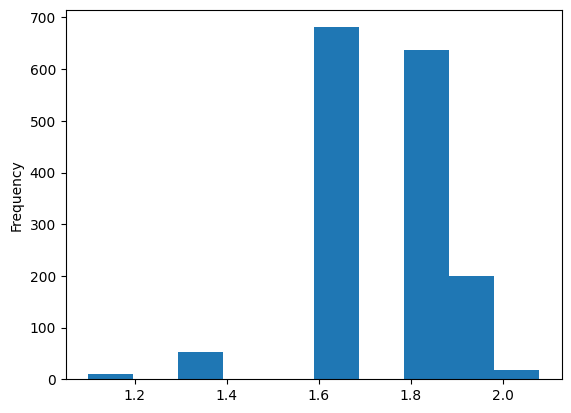

In [7]:
np.log(y).plot (kind='hist')

In [8]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


 primero hemos probado a predecir 'quality', que se trata de una variable discreta, con lo cual se trataría de un modelo de clasificación. 
 ________________________________________________________________________________________________________________________________

 Así pues, vamos a probar a predecir el 'alcohol', que es una variable numérica continua, con lo que será un modelo de regresión.

In [9]:
df = data.copy()

In [10]:
X = df.drop (columns ='alcohol')
y = df ['alcohol']

In [11]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# esc = StandardScaler()

# esc.fit(X)

# X_esc = esc.transform(X)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

esc = PowerTransformer()

esc.fit(X)

X_esc = esc.transform(X)

In [13]:
X = X_esc

<Axes: ylabel='Frequency'>

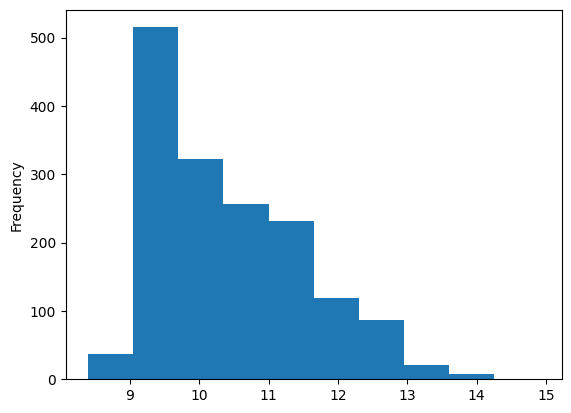

In [14]:
y.plot (kind='hist')

In [15]:
y.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [16]:
np.log(y).mode()

0    2.251292
Name: alcohol, dtype: float64

In [17]:
np.log(y).describe()

count    1599.000000
mean        2.339021
std         0.098899
min         2.128232
25%         2.251292
50%         2.322388
75%         2.406945
max         2.701361
Name: alcohol, dtype: float64

<Axes: ylabel='Frequency'>

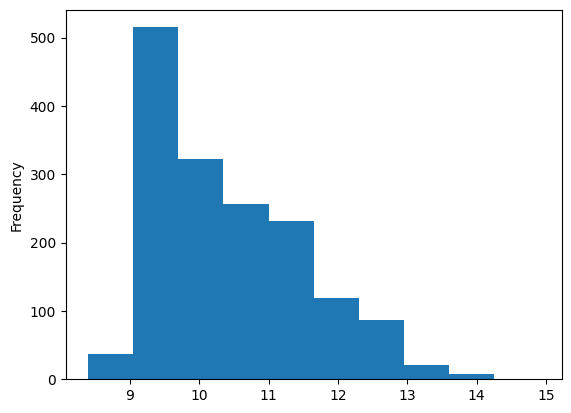

In [18]:
y.plot (kind='hist')

In [19]:
y = np.log(y)   # muy importante esta línea, pues aplicamos el logaritmo a la variable a predecir
# para hacer los test con esta nueva variable


In [20]:
X

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -7.77467217e-01],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517443e-01,  3.95139954e-01, -7.77467217e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054090e-01,  1.83771552e-01, -7.77467217e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868608e-01,  8.20841495e-01,  4.73370362e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -7.77467217e-01],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831604e-01,  2.56369273e-01,  4.73370362e-01]],
      shape=(1599, 11))

In [21]:
# sns.heatmap(X.corr(), annot= True, cmap = 'Reds')

In [25]:
filt_corr = np.where(np.abs(X.corr())>0.5, X.corr(), 0)

#creamos un nuevo dataframe
f_corr_df = pd.DataFrame(filt_corr, index=X.corr().index, columns=X.corr().columns)

<Axes: >

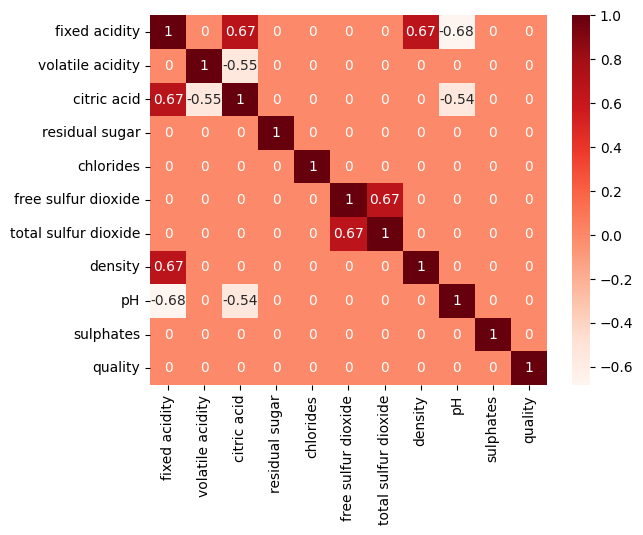

In [57]:
sns.heatmap(f_corr_df, annot= True, cmap = 'Reds')
# sns.heatmap(np.where(np.abs(X.corr())>0.5, X.corr(), 0), annot = True, cmap = 'Reds')

quiero hacer un modelo para ...

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=69)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict (X_test)

print('RMSE:',root_mean_squared_error (y_test, y_pred))
print('R2:',r2_score(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error (y_test, y_pred))

RMSE: 0.6428867300055872
R2: 0.6416592761143471
MAPE: 0.04778630450600939


A ver si podemos entrenar mejor al modelo, cambiar variables, combinarlas, juntarlas, etc.. y/o probar modelos de 

lo primero, la distribución de la y estaba sesgada y ya mejora cuando le aplicamos el logaritmo, cosa que ya hicimos.

In [29]:
pd.DataFrame(X).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,8.000000


_________________

## Clase para regresión lineal


In [30]:
import numpy as np
import pandas as pd

class LinearRegressionBootcamp:
    def __init__(self, normalized = False):
        self.coeficientes = None
        self.intercept = None
        self.media = None
        self.desviacion_estandar = None
        self.normalized = normalized
        
    def _normalizado_features (self,X:pd.DataFrame):
        self.media = X.mean (axis=0)
        self.desviacion_estandar = X.std (axis=0)
        
        return (X - self.media)/ self.desviacion_estandar
    
    def fit (self,df:pd.DataFrame, target:str):
        X = df.drop (columns = target)
        self.feature_columns = X.columns
        y = df[target].values
        
        if self.normalized:
            X = self._normalizado_features (X)
            
        X = np.c_[np.ones(X.shape[0]),X]    # agrega la columna de unos para el intercepto
        
        theta = np.linalg.solve(X.T @ X, X.T @ y)
        
        self.intercepto = theta[0]
        self.coeficientes = theta[1:]
    
    def predict (self, df: pd.DataFrame):
        
        if self.coeficientes is None or self.intercepto is None:
            raise ValueError ("El modelo no ha sido entrenado.")
        
        X = df[self.feature_columns].copy()
        
        if self.normalized:
            X = self._normalizado_features(X)
            
        X = X.values
            
        #print (X.shape)
        #print(self.coeficientes.shape)    
        y_pred = self.intercepto +np.dot (X, self.coeficientes)
        
        return y_pred  

In [38]:
# X_train, X_test, y_train, y_test = train_test_split( df.drop( columns='alcohol'), 'alcohol', test_size=.2, random_state=69)


model = LinearRegressionBootcamp(normalized = True)

model.fit (df, 'alcohol')

print ('Interepto:', model.intercepto)
print ('Coeficientes:', model.coeficientes)

y_pred = model.predict (df)

print('RMSE:',root_mean_squared_error (df['alcohol'], y_pred))
print('R2:',r2_score(df['alcohol'], y_pred))
print('MAPE:',mean_absolute_percentage_error (df['alcohol'], y_pred))



Interepto: 10.422983114446494
Coeficientes: [ 0.85745535  0.10552457  0.15968768  0.36993179 -0.04390991 -0.03157529
 -0.04573902 -1.08263909  0.55842251  0.1617152   0.18753436]
RMSE: 0.5919529738606677
R2: 0.6912531089251452
MAPE: 0.043295300438974574


In [52]:
print (type(X))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [45]:
from sklearn.preprocessing import StandardScaler

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns='alcohol')
y = df['alcohol']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Aplicar StandardScaler solo a las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Usar los mismos parámetros de escalado

# 🔹 Convertir de vuelta a DataFrame para evitar problemas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


# Crear y entrenar el modelo
model = LinearRegressionBootcamp(normalized=False)  # Ya estamos normalizando con StandardScaler
model.fit(X_train_scaled, y_train)

# Obtener coeficientes e intercepto
print("Intercepto:", model.intercepto)
print("Coeficientes:", model.coeficientes)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)
print("MAPE:", mape)

KeyError: '[9.4, 10.0, 9.7, 10.5, 10.2, 10.0, 10.9, 9.0, 9.5, 9.9, 12.2, 11.2, 11.1, 10.5, 11.9, 11.3, 9.5, 11.5, 10.6, 9.8, 9.5, 10.0, 10.9, 10.4, 9.9, 14.0, 10.6, 10.0, 9.7, 10.2, 11.4, 9.4, 11.3, 12.8, 10.2, 11.8, 9.6, 10.6, 11.6, 9.3, 10.6, 9.6, 9.7, 9.4, 10.4, 9.4, 9.3, 11.3, 9.5, 9.0, 9.4, 10.2, 10.2, 11.8, 9.4, 9.3, 10.4, 9.6, 10.8, 10.8, 11.1, 12.0, 9.5, 9.8, 10.0, 10.7, 10.9, 9.7, 9.5, 9.5, 11.4, 11.1, 9.6, 11.7, 9.8, 10.6, 10.8, 9.5, 9.4, 10.5, 11.8, 12.4, 9.4, 10.0, 9.2, 10.4, 14.0, 9.5, 9.25, 11.8, 9.4, 11.5, 12.0, 10.3, 10.4, 11.9, 9.7, 9.5, 11.6, 9.5, 12.3, 11.5, 9.8, 10.4, 10.5, 9.1, 9.7, 9.55, 11.0, 12.2, 11.6, 10.9, 10.5, 10.0, 8.8, 10.2, 11.0, 10.3, 9.3, 10.5, 9.9, 9.5, 10.8, 11.9, 12.4, 9.3, 10.2, 11.2, 10.75, 9.3, 11.6, 10.1, 11.3, 9.2, 9.2, 11.3, 10.8, 9.9, 10.8, 9.4, 11.2, 9.4, 13.2, 9.3, 11.0, 11.7, 11.8, 9.6, 9.5, 9.3, 12.3, 11.4, 10.3, 10.9, 10.3, 10.0, 9.8, 11.0, 10.7, 10.2, 9.0, 9.1, 11.2, 9.2, 9.56666666666667, 11.3, 10.0, 11.0, 9.3, 9.5, 10.5, 9.5, 10.1, 9.5, 10.0, 11.0, 10.1, 10.7, 10.8, 12.9, 11.3, 8.7, 11.3, 10.2, 11.0, 11.4, 9.8, 9.6, 9.6, 10.5, 9.5, 9.55, 10.8, 9.9, 10.9, 11.2, 10.6, 11.6, 9.3, 9.4, 10.9, 10.9, 10.4, 9.5, 10.4, 9.4, 9.4, 9.5, 11.7, 10.3, 9.4, 11.8, 9.3, 13.3, 9.4, 12.0, 11.5, 11.3, 10.0, 9.9, 10.9, 9.5, 12.8, 10.4, 10.9, 9.4, 10.0, 9.5, 9.5, 12.8, 11.9, 9.5, 9.8, 10.1, 12.8, 9.5, 11.8, 10.0, 9.5, 10.5, 10.6, 9.5, 9.8, 9.2, 9.5, 11.8, 12.2, 10.1, 9.6, 10.0, 9.5, 12.1, 10.2, 9.2, 9.5, 11.1, 9.5, 11.5, 10.7, 10.0, 9.1, 10.0, 10.8, 13.6, 10.8, 10.8, 11.2, 11.5, 11.5, 10.0, 10.3, 11.9, 10.0, 9.7, 11.6, 10.8, 11.0, 11.3, 9.7, 11.5, 12.5, 9.7, 9.6, 10.2, 11.0, 9.6, 10.7, 9.2, 9.8, 9.8, 12.9, 10.0333333333333, 9.4, 9.3, 9.6, 10.9, 10.5, 11.3, 10.2, 10.1, 11.8, 9.4, 11.0, 11.2, 9.9, 11.1, 9.3, 10.6, 12.1, 9.6, 9.5, 9.7, 11.0, 9.6, 11.4, 9.8, 10.4, 10.3, 10.1, 9.6, 10.4, 9.5, 9.0, 12.8, 11.4, 9.2, 12.5, 9.4, 13.3, 10.4, 9.0, 9.4, 9.8, 11.0, 12.9, 9.9, 10.1, 11.3, 9.4, 9.7, 10.9, 9.6, 10.5, 9.6, 9.3, 11.5, 10.6, 12.7, 10.2, 9.4, 9.9, 10.5, 10.5, 10.0, 10.5, 9.2, 9.1, 9.5, 12.5, 9.4, 9.4, 11.4, 9.7, 10.5, 9.8, 10.9, 9.9, 10.4, 12.3, 12.4, 10.2, 11.2, 9.4, 10.8, 9.5, 10.7, 9.7, 12.8, 9.0, 9.3, 10.3, 12.4, 9.3, 11.0, 10.8, 9.4, 9.3, 9.8, 11.1, 11.8, 9.5, 9.3, 9.5, 10.5, 9.2, 9.4, 9.9, 10.9, 9.0, 12.9, 10.0, 10.4, 11.6, 10.4, 9.9, 10.2, 10.3, 9.5, 9.3, 12.7, 11.2, 9.8, 9.5, 10.8, 10.0, 10.6, 10.0, 10.5, 10.7, 9.5, 12.1, 10.5, 12.0, 10.7, 9.4, 11.7, 10.0, 10.8, 11.2, 12.2, 9.9, 10.1, 11.0, 11.7, 10.9, 11.3, 9.5, 9.0, 10.9, 10.2, 12.2, 11.5, 10.4, 9.0, 13.6, 9.9, 11.6, 10.0, 12.8, 11.6, 10.5, 9.5, 12.4, 9.0, 13.4, 10.6, 9.9, 10.8, 9.7, 9.3, 12.8, 10.1, 9.7, 10.8, 10.9, 9.3, 13.0, 9.3, 12.8, 11.0, 10.6, 10.5, 9.6, 11.5, 9.8, 9.9, 9.2, 11.0, 10.5, 9.2, 11.3, 9.4, 12.0, 9.2, 9.5, 13.5, 11.7, 9.2, 9.5, 9.0, 11.1, 9.9, 10.9, 9.7, 9.9, 9.9, 9.7, 9.5, 11.6, 10.1, 10.5, 9.6, 9.3, 9.5, 9.4, 11.9, 10.2, 10.3, 9.8, 11.7, 11.2, 11.0, 12.7, 11.7, 12.9, 13.0, 9.4, 11.2, 11.4, 9.4, 11.7, 10.7, 11.3, 10.7, 12.9, 11.1, 11.4, 12.3, 9.8, 9.4, 11.3, 9.4, 9.7, 9.2, 9.8, 9.6, 9.4, 9.2, 10.9, 9.6, 9.3, 14.9, 9.2, 9.5, 9.6, 9.6, 9.5, 12.3, 13.5666666666667, 9.4, 12.4, 10.1, 11.3, 10.3, 10.0333333333333, 9.2, 10.4, 10.8, 10.0, 9.4, 10.8, 10.0, 10.0, 10.2, 9.8, 9.4, 9.9, 10.2, 11.0, 9.3, 9.2, 11.6, 9.3, 9.2, 10.9, 9.2, 9.7, 9.6, 9.4, 10.1, 11.4, 12.6, 10.4, 10.5, 9.9, 10.2, 10.1, 10.2, 12.0, 10.1, 9.5, 9.5, 9.3, 12.8, 9.6, 9.5, 10.4, 9.1, 10.1, 9.8, 12.7, 11.8, 11.9, 13.0, 10.2, 10.1, 12.1, 9.9, 11.95, 12.4, 9.2, 10.8, 9.5, 11.8, 10.5, 9.5, 10.2, 9.4, 10.8, 11.2, 9.8, 10.8, 11.0, 9.23333333333333, 10.7, 9.5, 9.2, 9.9, 11.2, 10.5, 10.0, 9.5, 10.1, 12.1, 11.0, 10.0, 11.2, 9.5, 10.2, 9.0, 9.3, 11.4, 9.8, 12.0, 9.5, 11.2, 9.3, 11.6, 10.5, 11.0, 9.9, 12.2, 9.3, 11.0, 12.5, 10.4, 11.4, 9.6, 9.4, 10.3, 12.0, 9.8, 9.5, 11.3, 12.5, 12.4, 10.7, 10.2, 11.4, 9.6, 10.0, 10.3, 10.7, 11.0, 10.4, 10.4, 9.4, 10.3, 9.4, 10.3, 9.9, 9.2, 9.1, 9.8, 10.4, 9.4, 11.3, 12.5, 10.8, 9.4, 9.7, 12.5, 11.4, 10.5, 11.0, 9.7, 9.2, 11.9, 9.8, 10.0, 11.7, 10.5, 9.4, 9.6, 11.2, 9.5, 9.4, 10.0, 11.5, 9.8, 10.2, 10.1, 10.6, 9.6, 9.3, 11.0, 10.7, 9.4, 11.1, 10.0, 10.6, 10.1, 10.1, 12.6, 9.0, 11.4, 9.8, 9.3, 9.5, 9.4, 12.0, 9.8, 10.8, 9.4, 11.7, 11.5, 11.5, 11.0, 10.3, 10.6, 10.7, 11.2, 9.5, 11.5, 10.1, 10.0, 9.1, 9.8, 10.6, 11.0, 9.95, 10.5, 9.2, 9.8, 8.4, 9.5, 9.8, 11.5, 9.8, 9.5, 12.7, 9.5, 9.5, 9.3, 9.3, 10.2, 9.5, 10.0, 13.0, 12.2, 9.8, 11.1, 10.0, 11.1, 11.0, 14.0, 10.8, 10.5, 10.3, 9.5, 11.5, 11.0, 10.3, 9.5, 9.4, 9.4, 10.9, 12.5, 12.1, 9.8, 10.1, 9.5, 9.9, 9.9, 11.1, 10.9, 9.4, 11.2, 9.3, 10.7, 8.8, 9.8, 9.2, 10.7, 11.8, 11.0, 9.5, 9.6, 9.4, 9.9, 10.2, 9.4, 11.8, 9.7, 9.8, 9.8, 9.7, 11.8, 11.8, 9.0, 11.4, 9.9, 11.3, 12.8, 10.0, 11.7, 10.7, 12.8, 9.9, 9.5, 9.5, 10.3, 11.0, 14.0, 11.4, 12.9, 11.7, 9.5, 11.9, 9.3, 12.0, 11.4, 11.3, 9.0, 9.8, 9.8, 9.7, 9.4, 12.0, 9.9, 10.8, 11.0, 9.5, 10.9, 12.3, 10.8, 9.5, 10.5, 10.5, 9.4, 9.3, 9.5, 9.4, 10.7, 11.1, 9.5, 9.0, 9.8, 9.1, 9.5, 11.2, 9.7, 9.8, 11.1, 9.4, 9.5, 11.0, 11.1, 8.4, 9.0, 9.5, 11.5, 9.4, 9.2, 11.5, 10.3, 9.2, 10.3, 9.7, 11.7, 12.2, 9.9, 9.4, 11.4, 10.0, 9.5, 10.2, 9.5, 12.3, 11.9, 14.0, 10.1, 9.5, 9.7, 9.5, 9.2, 12.4, 10.0, 10.2, 9.2, 10.5, 11.2, 9.2, 10.1, 12.1, 9.7, 9.6, 12.5, 11.4, 12.2, 9.2, 9.7, 10.9, 10.1, 11.1, 10.5, 9.4, 9.5, 11.3, 10.8, 10.1, 12.3, 11.3, 11.9, 11.3, 10.6, 11.0, 9.9, 12.0, 10.1, 11.0, 10.0, 10.5, 9.8, 10.6, 9.9, 10.4, 10.2, 10.5, 13.1, 11.1, 11.0, 9.7, 9.9, 10.5, 9.8, 12.8, 9.2, 11.3, 11.2, 9.4, 9.8, 10.5, 9.8, 11.6, 12.3, 9.1, 10.6, 9.6, 9.0, 9.7, 9.7, 9.2, 9.7, 11.3, 10.0, 10.1, 10.3, 12.7, 9.4, 9.5, 9.8, 8.7, 11.4, 11.4, 9.3, 11.4, 10.3, 11.2, 10.7, 11.8, 9.1, 10.6, 11.2, 12.6, 11.8, 10.0, 10.4, 9.5, 9.7, 10.9, 10.55, 10.5, 11.4, 12.4, 9.4, 9.5, 10.7, 9.4, 9.8, 11.3, 10.5, 11.0, 10.6, 10.5, 9.1, 9.5, 10.2, 9.5, 9.7, 11.9, 10.5, 9.2, 11.4, 11.2, 9.5, 9.8, 9.2, 9.6, 9.3, 9.1, 9.3, 10.9, 10.9, 12.3, 10.8, 9.4, 9.5, 12.1, 10.4, 12.0, 11.8, 9.8, 10.4, 9.4, 10.0, 9.5, 12.7, 9.8, 10.2, 11.5, 9.8, 9.5, 12.2, 9.9, 11.7, 10.1, 10.2, 12.5, 9.1, 11.3, 11.3, 11.1, 10.0, 9.7, 11.2, 9.4, 9.2, 9.1, 9.0, 10.1, 10.4, 9.5, 10.3, 11.5, 9.8, 9.7, 12.8, 9.8, 10.6, 12.3, 9.8, 10.4, 9.5, 9.5, 9.2, 9.6, 10.6, 9.6, 10.9, 11.0, 10.4, 9.6, 10.6, 9.9, 11.2, 9.7, 9.6, 10.9, 9.2, 10.0, 10.8, 9.4, 9.5, 9.6, 10.4, 9.5, 12.0, 12.3, 9.5, 10.8, 10.8, 10.2, 9.2, 9.7, 10.2, 10.4, 9.6, 9.6, 12.5, 11.1, 10.2, 9.2, 10.2, 10.3, 9.0, 9.6, 9.5, 9.9, 9.8, 13.0, 9.4, 10.0, 12.7, 9.4, 9.5, 9.5, 12.9, 9.5, 11.2, 10.8, 10.1, 12.5, 10.7, 10.8, 10.5, 10.3, 11.1, 12.5, 9.6, 9.2, 9.2, 9.4, 9.8, 9.2, 9.4, 11.9, 12.0, 9.2, 11.8, 10.5, 9.8, 12.4, 10.7, 9.9, 9.3, 9.1, 9.6, 10.5, 9.4, 9.6, 11.8, 10.1, 9.8, 13.3, 11.8, 8.5, 11.0, 10.3, 12.5, 9.7, 11.8, 12.0, 10.0, 11.5, 12.6, 10.5, 10.9, 11.4, 11.0, 9.7, 10.0, 9.3, 10.5, 9.9, 9.0, 11.0, 10.9, 9.5, 10.0, 9.6, 9.1, 10.2, 11.4, 9.6, 9.8, 10.1, 9.4, 9.0, 9.1, 10.4, 10.2, 9.4, 10.0, 9.5, 10.9, 9.5, 9.2, 10.2, 9.3, 11.2, 11.4, 9.8, 10.9, 10.4, 9.4, 10.9, 10.8, 9.5, 9.7, 12.8, 11.1, 11.4, 9.6, 9.6, 10.1, 10.4, 10.0, 11.1, 10.0, 10.9, 10.6, 9.6, 10.5, 11.3, 14.0, 11.1, 11.3, 9.9, 11.7, 9.4, 13.6, 10.4, 9.7, 9.7, 10.5, 11.8, 10.1, 9.4, 9.9, 9.0, 10.9, 10.2, 9.4, 9.3, 9.8, 9.8, 9.5, 10.0, 10.9, 11.0, 10.4, 12.6, 11.5, 9.1, 9.3, 9.3, 9.6, 11.0] not found in axis'